In [30]:
!pip install KoNLPy

In [29]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.7/168.7 kB 8.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import *

In [3]:
df = pd.read_csv('../data/AICC_Project_wanted_raw.csv')
df.head(2)

,Unnamed: 0,Location,Company,Title,Career,Skill,Address,URL,InfoDetails,Tag,D_Day
0,0,서울 강남구,엔쓰리엔(N3N),Deep Learning Engineer (Vision 연구/개발),경력 1-5년,"Pytorch,Python,OpenCV",강남구 강남대로162길 41-18,https://www.wanted.co.kr/wd/221071,포지션 상세\n• 엔쓰리엔에서 AI Service를 위한 Vision 개발자를 모십...,"자유로운휴가,유망산업,커피·스낵바,건강검진지원,장비지원,식대지원,유연근무,육아휴직,...",상시채용
1,1,서울 강남구,웨이커,AI NLP 엔지니어(LLM 최적화),경력 3-9년,"Git,JIRA,Redis,Python,NLP,AWS,Spring Framework","서울특별시 강남구 선릉로 667 11층 waiker, Inc",https://www.wanted.co.kr/wd/215269,포지션 상세\n증시 데이터 환경을 기술로 개선하고 있는 웨이커입니다.\n\n웨이커는...,"유망산업,자기계발지원,건강검진지원,유연근무,커피·스낵바,설립4~9년",2024.07.31


In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,Location,Company,Title,Career,Skill,Address,URL,InfoDetails,Tag,D_Day
0,서울 강남구,엔쓰리엔(N3N),Deep Learning Engineer (Vision 연구/개발),경력 1-5년,"Pytorch,Python,OpenCV",강남구 강남대로162길 41-18,https://www.wanted.co.kr/wd/221071,포지션 상세\n• 엔쓰리엔에서 AI Service를 위한 Vision 개발자를 모십...,"자유로운휴가,유망산업,커피·스낵바,건강검진지원,장비지원,식대지원,유연근무,육아휴직,...",상시채용
1,서울 강남구,웨이커,AI NLP 엔지니어(LLM 최적화),경력 3-9년,"Git,JIRA,Redis,Python,NLP,AWS,Spring Framework","서울특별시 강남구 선릉로 667 11층 waiker, Inc",https://www.wanted.co.kr/wd/215269,포지션 상세\n증시 데이터 환경을 기술로 개선하고 있는 웨이커입니다.\n\n웨이커는...,"유망산업,자기계발지원,건강검진지원,유연근무,커피·스낵바,설립4~9년",2024.07.31
2,서울 강남구,셀렉트스타,AI NLP 연구원,경력 3-5년,"Git,MySQL,Pytorch,Tensorflow,Python,Spring Fra...","서울특별시 강남구 테헤란로20길 20, 삼정빌딩 10F/11F",https://www.wanted.co.kr/wd/160748,"포지션 상세\n셀렉트스타는 ""AI를 통해 IT 산업을 발전시켜 세상을 더 편하게 만...","유망산업,장비지원,유급휴가,식대지원,재택근무,무제한연차,설립4~9년",상시채용
3,서울 강남구,덴컴,Front-end 개발자,경력 4-10년,"Git,GraphQL,React,JavaScript,Kotlin,Node.js,Py...","서울특별시 강남구 삼성로85길 26, V&S 14층",https://www.wanted.co.kr/wd/214274,포지션 상세\n음성인식 엔진을 활용하여 다양한 음성인식 서비스를 개발하는 시니어 프...,"유연근무,리프레시휴가,편의시설,식대지원,유망산업,스톡옵션,커피·스낵바,설립4~9년",상시채용
4,서울 송파구,테스트웍스,NLP/LLM 엔지니어,경력 3-10년,"React,TypeScript,JPA,jQuery UI,Spring Boot",송파구 백제고분로41길 41-29 더블유 123빌딩 3층,https://www.wanted.co.kr/wd/210245,포지션 상세\n인공지능 데이터 및 검증 전문기업\n테스트웍스는 다년 간 데이터 중심...,"유망산업,워크샵,식대지원,사내동호회,스톡옵션,커피·스낵바,설립4~9년",상시채용


In [6]:
df['Skill']

0                                  Pytorch,Python,OpenCV
1         Git,JIRA,Redis,Python,NLP,AWS,Spring Framework
2      Git,MySQL,Pytorch,Tensorflow,Python,Spring Fra...
3      Git,GraphQL,React,JavaScript,Kotlin,Node.js,Py...
4             React,TypeScript,JPA,jQuery UI,Spring Boot
                             ...                        
212                                       Android,Kotlin
213    ExpressJS,MongoDB,React,JavaScript,Node.js,Typ...
214    Git,Github,Slack,GraphQL,Rust,Docker,Visual St...
215    Git,Github,Android,iOS,Linux,React,Kotlin,Swif...
216           Github,React,Scikit-Learn,Python,AWS,NumPy
Name: Skill, Length: 217, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     217 non-null    object
 1   Company      217 non-null    object
 2   Title        217 non-null    object
 3   Career       217 non-null    object
 4   Skill        167 non-null    object
 5   Address      217 non-null    object
 6   URL          217 non-null    object
 7   InfoDetails  217 non-null    object
 8   Tag          215 non-null    object
 9   D_Day        217 non-null    object
dtypes: object(10)
memory usage: 17.1+ KB


In [8]:
len(df['Skill'])

217

In [9]:
df_skill = df['Skill']

In [10]:
df_skill = df_skill.dropna()

In [41]:
skill_stack = []
for i in df_skill:
    skill_stack.append(i)

In [97]:
skill_stack_str = ' '.join(skill_stack)
skillList = skill_stack_str.split(',')
skill_list = list(set(skillList))
skill_list

['FastAPI Flask',
 '3D 렌더링',
 'C++ Pytorch Git',
 'AWS Linux',
 'Spark',
 'MySQL',
 'ML Pytorch BitBucket',
 'CSS3',
 'OpenCV Git',
 'Tensorflow Pytorch',
 '2개 더 보기 Pytorch',
 '4개 더 보기 Pytorch Pytorch',
 'PCB 디자인',
 'JPA',
 'C Git',
 'CUDA Spark',
 'ML Python Git',
 'Tensorflow',
 '딥 러닝',
 'Restful API Pytorch',
 'Swift',
 'IEC',
 'Spring Framework Github',
 'Spa',
 'OpenGL',
 'ES6',
 'FastAPI',
 'ObjectiveC',
 'AngularJS',
 'Docker',
 'Restful API Git',
 'Windows Azure',
 'Spring Framework Hadoop',
 'PostgreSQL React',
 '3개 더 보기 Git',
 'Docker MySQL',
 '하드웨어 개발',
 'Spring Framework Python Python',
 'Django',
 'NLP',
 'OpenCV',
 'Spring Framework Git',
 'Modbux',
 'Python',
 'C Pytorch',
 'C#',
 'Kubernetes',
 '2개 더 보기 C / C++',
 'Visual Studio Code',
 'Python Git',
 '개발',
 'OpenCV Linux',
 'AWS Github',
 'Flask',
 'C++ CAD',
 'React',
 'Next.js Git',
 'Flutter Linux',
 'iOS',
 'Node.js',
 'TDD',
 'JSP',
 'NoSQL',
 'ML Git',
 'NumPy Github',
 'Spring Boot Git',
 'Restful API Github',
 

In [103]:
unique_skill = []
for i in skill_list:
    if '1개 더 보기 ' in i:
        i = i.replace('1개 더 보기 ', '')
    elif '2개 더 보기 ' in i:
        i = i.replace('2개 더 보기 ', '')
    elif '3개 더 보기' in i:
        i = i.replace('3개 더 보기 ', '')
    elif '4개 더 보기' in i:
        i = i.replace('4개 더 보기 ', '')
    else:
        i = i
        unique_skill.append(i)

unique_skill

['FastAPI Flask',
 '3D 렌더링',
 'C++ Pytorch Git',
 'AWS Linux',
 'Spark',
 'MySQL',
 'ML Pytorch BitBucket',
 'CSS3',
 'OpenCV Git',
 'Tensorflow Pytorch',
 'PCB 디자인',
 'JPA',
 'C Git',
 'CUDA Spark',
 'ML Python Git',
 'Tensorflow',
 '딥 러닝',
 'Restful API Pytorch',
 'Swift',
 'IEC',
 'Spring Framework Github',
 'Spa',
 'OpenGL',
 'ES6',
 'FastAPI',
 'ObjectiveC',
 'AngularJS',
 'Docker',
 'Restful API Git',
 'Windows Azure',
 'Spring Framework Hadoop',
 'PostgreSQL React',
 'Docker MySQL',
 '하드웨어 개발',
 'Spring Framework Python Python',
 'Django',
 'NLP',
 'OpenCV',
 'Spring Framework Git',
 'Modbux',
 'Python',
 'C Pytorch',
 'C#',
 'Kubernetes',
 'Visual Studio Code',
 'Python Git',
 '개발',
 'OpenCV Linux',
 'AWS Github',
 'Flask',
 'C++ CAD',
 'React',
 'Next.js Git',
 'Flutter Linux',
 'iOS',
 'Node.js',
 'TDD',
 'JSP',
 'NoSQL',
 'ML Git',
 'NumPy Github',
 'Spring Boot Git',
 'Restful API Github',
 'Android',
 'Arduino C / C++',
 'Docker Git',
 'Flutter Github',
 'Docker Python',
 

In [106]:
unique_skill_str = ','.join(unique_skill)
unique_skill_str

'FastAPI Flask,3D 렌더링,C++ Pytorch Git,AWS Linux,Spark,MySQL,ML Pytorch BitBucket,CSS3,OpenCV Git,Tensorflow Pytorch,PCB 디자인,JPA,C Git,CUDA Spark,ML Python Git,Tensorflow,딥 러닝,Restful API Pytorch,Swift,IEC,Spring Framework Github,Spa,OpenGL,ES6,FastAPI,ObjectiveC,AngularJS,Docker,Restful API Git,Windows Azure,Spring Framework Hadoop,PostgreSQL React,Docker MySQL,하드웨어 개발,Spring Framework Python Python,Django,NLP,OpenCV,Spring Framework Git,Modbux,Python,C Pytorch,C#,Kubernetes,Visual Studio Code,Python Git,개발,OpenCV Linux,AWS Github,Flask,C++ CAD,React,Next.js Git,Flutter Linux,iOS,Node.js,TDD,JSP,NoSQL,ML Git,NumPy Github,Spring Boot Git,Restful API Github,Android,Arduino C / C++,Docker Git,Flutter Github,Docker Python,SSH Git,Kubernetes Linux,C / C++,AWS Git,IoT,3D 모델링,AWS Android,Perl,Kubernetes Github,C++ 회로,C++,ML Android,ML NLP,API,FastAPI DirectX,Vue.JS Java,OpenCV Pytorch,jQuery,API 개발,C,TypeScript Django,Notion React,Scala,SQL Confluence,CUDA Python,OpenCV Hadoop,PCB 레이아웃 설계,Jav

In [107]:
with open('skill_stack.txt', 'w') as file:
    file.write(unique_skill_str)

In [47]:
with open('skill_stack_str.txt', 'w') as file:
    file.write(skill_stack_str)

In [12]:
text = open('../data/skill_stack_str.txt').read()

In [13]:
text

'Pytorch,Python,OpenCV Git,JIRA,Redis,Python,NLP,AWS,Spring Framework Git,MySQL,Pytorch,Tensorflow,Python,Spring Framework,OpenCV Git,GraphQL,React,JavaScript,Kotlin,Node.js,Python,Swift,TypeScript,NoSQL,Notion React,TypeScript,JPA,jQuery UI,Spring Boot Pytorch,Tensorflow Pytorch,Tensorflow Android,iOS,MySQL,Pytorch,Tensorflow,Java,Kotlin,ObjectiveC,Python,Swift,C,Docker,내시경,의료 영상,NumPy,4개 더 보기 Github,React,HTML,JavaScript,TypeScript,Figma Python,C,C++,CUDA Spark,AWS Git,GraphQL,React,JavaScript,Kotlin,Node.js,Python,Swift,TypeScript,NoSQL,Notion Git,GraphQL,React,JavaScript,Kotlin,Node.js,Python,Swift,TypeScript,NoSQL,Notion Python,C,C++,CUDA Python,하드웨어,C++,IP,하드웨어 설계,Verilog,ASIC,하드웨어 개발,SystemVerilog,하드웨어 아키텍처 Pytorch,React,Tensorflow,JavaScript,TypeScript,HTML5,CSS3,Redux,Next.js Git,Linux,Pytorch,Redis,Python,Docker,PostgreSQL,ElasticSearch,Kubernetes,FastAPI,Restful API,ML Python Git,Flask,Pytorch,Tensorflow,Python Tensorflow,Python,SQL,AWS Pytorch,React,Scikit-Learn,Tensorflow,

In [14]:
wordcloud = WordCloud().generate(text)

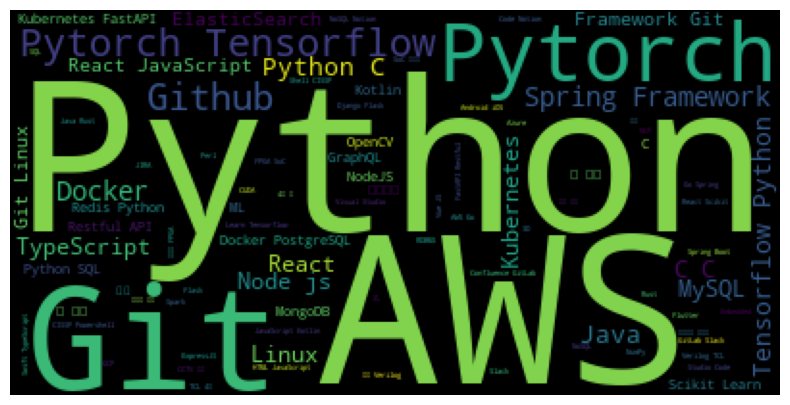

In [15]:
plt.figure(figsize= (10,5))
plt.imshow(wordcloud, interpolation = 'kaiser')
plt.axis('off')
plt.show()

In [16]:
wordcloud = WordCloud(max_words = 20, background_color = '#FFFFFF').generate(text)

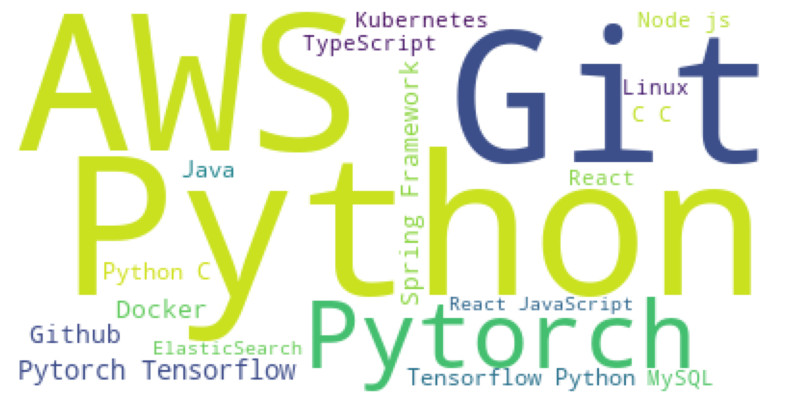

In [17]:
plt.figure(figsize= (10, 5))
plt.imshow(wordcloud, interpolation = 'kaiser')
plt.axis('off')
plt.show()

In [77]:
infoDetails = df['InfoDetails']

In [110]:
infoDetail = ' '.join(infoDetails)
infoDetail.replace('포지션 상세', '').replace('• ', '').replace('- ','').replace('ㆍ','').replace('    ', '').split('\n')

['',
 '엔쓰리엔에서 AI Service를 위한 Vision 개발자를 모십니다.',
 '주요업무',
 'Vision AI Application을 위한 딥러닝 모델 개발 및 고도화',
 'Object Detection 및 Segmentation',
 'Human Pose Estimation',
 'Multi-model(비전/자연어) 모델 개발',
 'On-Device AI 모델을 위한 딥러닝 모델 경량화',
 '자격요건',
 '관련분야 전공자 또는 2년이상 경력 보유',
 '컴퓨터 비전 딥러닝 모델 개발 경험',
 'OpenCV, Pytorch 등을 활용한 딥러닝 기반 영상 처리 프로젝트 진행',
 'Python 숙련자',
 '우대사항',
 '컴퓨터 비전 관련 Multi-modal 모델 개발 경험자',
 '컴퓨터 비전 On-Device AI 모델 개발 경험자',
 '관련 분야 논문(CVPR,ECCV,ICCV,ACCV등 )실적 보유자',
 '혜택 및 복지',
 '【몰입지원】',
 '08~10시 시차출퇴근',
 '연차/반차/반반차 (2시간 단위)',
 '무인편의점 운영(커피/음료/시리얼/라면 등)',
 '최신형 업무장비 (노트북/듀얼모니터 등)',
 '【성장지원】',
 '유료 소프트웨어 지원',
 '도서구입비/인프런 교육비 지원',
 '교육 참가 지원 (학회/포럼/세미나/컨퍼런스 등)',
 '【휴식지원】',
 '경조휴가',
 '리프레시 휴가',
 '건강검진휴가 (1일)',
 '가족돌봄휴가',
 '모성보호휴가 (배우자출산/산전후/난임치료/태아검진 등)',
 '육아휴직 및 근로시간단축 (임신기/육아기)',
 '【기타지원】',
 '야근식비 지원',
 '퇴직연금 가입',
 '인센티브',
 '라운지 휴게공간',
 '경조비 및 화환',
 '명절 선물',
 '웰컴키트',
 '【개발문화】',
 'https://www.notion.so/N3N-ac157fc4e2424fa6ad31b34dfbc3de95 ',
 '증시 데이터 환경을 기술로 개선하고 있는 웨이커입니다.',
 '',
